# Weather Prediction [Random Forest]

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import warnings
warnings.filterwarnings('ignore')

### Loading Dataset

In [2]:
data = pd.read_csv('E:/Data_Science - Resources/Data Analysis Project - Data/ML/seattle-weather.csv')

### Exploratory Data Analysis[EDA] & Data Cleaning

In [3]:
data.head()

date  precipitation  temp_max  temp_min  wind  weather
0  1/1/2012            0.0      12.8       5.0   4.7  drizzle
1  1/2/2012           10.9      10.6       2.8   4.5     rain
2  1/3/2012            0.8      11.7       7.2   2.3     rain
3  1/4/2012           20.3      12.2       5.6   4.7     rain
4  1/5/2012            1.3       8.9       2.8   6.1     rain

In [4]:
data.drop(['date'], axis = 1)

precipitation  temp_max  temp_min  wind  weather
0               0.0      12.8       5.0   4.7  drizzle
1              10.9      10.6       2.8   4.5     rain
2               0.8      11.7       7.2   2.3     rain
3              20.3      12.2       5.6   4.7     rain
4               1.3       8.9       2.8   6.1     rain
...             ...       ...       ...   ...      ...
1456            8.6       4.4       1.7   2.9     rain
1457            1.5       5.0       1.7   1.3     rain
1458            0.0       7.2       0.6   2.6      fog
1459            0.0       5.6      -1.0   3.4      sun
1460            0.0       5.6      -2.1   3.5      sun

[1461 rows x 5 columns]

In [5]:
data.shape

(1461, 6)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [7]:
data.describe(include = 'all')

date  precipitation     temp_max     temp_min         wind weather
count       1461    1461.000000  1461.000000  1461.000000  1461.000000    1461
unique      1461            NaN          NaN          NaN          NaN       5
top     1/1/2012            NaN          NaN          NaN          NaN    rain
freq           1            NaN          NaN          NaN          NaN     641
mean         NaN       3.029432    16.439083     8.234771     3.241136     NaN
std          NaN       6.680194     7.349758     5.023004     1.437825     NaN
min          NaN       0.000000    -1.600000    -7.100000     0.400000     NaN
25%          NaN       0.000000    10.600000     4.400000     2.200000     NaN
50%          NaN       0.000000    15.600000     8.300000     3.000000     NaN
75%          NaN       2.800000    22.200000    12.200000     4.000000     NaN
max          NaN      55.900000    35.600000    18.300000     9.500000     NaN

In [8]:
data.isnull().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [9]:
data.corr()

precipitation  temp_max  temp_min      wind
precipitation       1.000000 -0.228555 -0.072684  0.328045
temp_max           -0.228555  1.000000  0.875687 -0.164857
temp_min           -0.072684  0.875687  1.000000 -0.074185
wind                0.328045 -0.164857 -0.074185  1.000000

<Axes: >

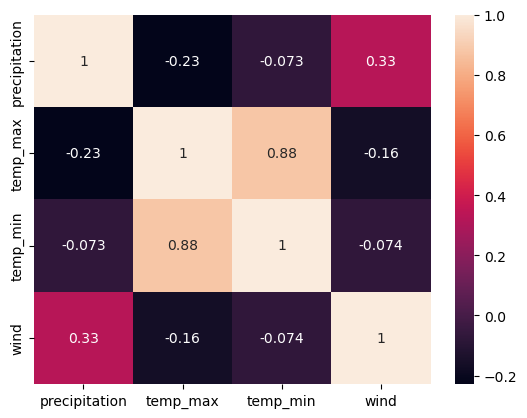

In [10]:
sns.heatmap(data.corr(), annot = True)

### Train and Test Data

In [11]:
x = data.drop(['date', 'weather'], axis = 1)
x

precipitation  temp_max  temp_min  wind
0               0.0      12.8       5.0   4.7
1              10.9      10.6       2.8   4.5
2               0.8      11.7       7.2   2.3
3              20.3      12.2       5.6   4.7
4               1.3       8.9       2.8   6.1
...             ...       ...       ...   ...
1456            8.6       4.4       1.7   2.9
1457            1.5       5.0       1.7   1.3
1458            0.0       7.2       0.6   2.6
1459            0.0       5.6      -1.0   3.4
1460            0.0       5.6      -2.1   3.5

[1461 rows x 4 columns]

In [12]:
y = data['weather']
y

0       drizzle
1          rain
2          rain
3          rain
4          rain
         ...   
1456       rain
1457       rain
1458        fog
1459        sun
1460        sun
Name: weather, Length: 1461, dtype: object

### Model Building

In [13]:
ens = RandomForestClassifier(criterion = 'entropy')
ens

RandomForestClassifier(criterion='entropy')

In [14]:
ens_train = ens.fit(x,y)

### Prediction

In [15]:
pred = ens_train.predict(x)

In [16]:
pred

array(['drizzle', 'rain', 'rain', ..., 'fog', 'sun', 'sun'], dtype=object)

### Evaluation

In [17]:
cm = confusion_matrix(y,pred)
cm

array([[ 50,   0,   1,   0,   2],
       [  0, 100,   0,   0,   1],
       [  0,   0, 641,   0,   0],
       [  0,   0,   0,  26,   0],
       [  0,   0,   0,   0, 640]], dtype=int64)

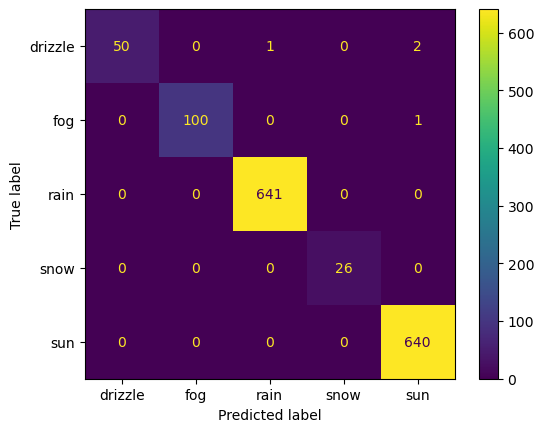

In [18]:
dis = ConfusionMatrixDisplay(cm, display_labels = ens_train.classes_)
dis.plot()

In [19]:
accuracy_score(y , pred)

0.9972621492128679

In [20]:
1- accuracy_score(y, pred)

0.002737850787132068

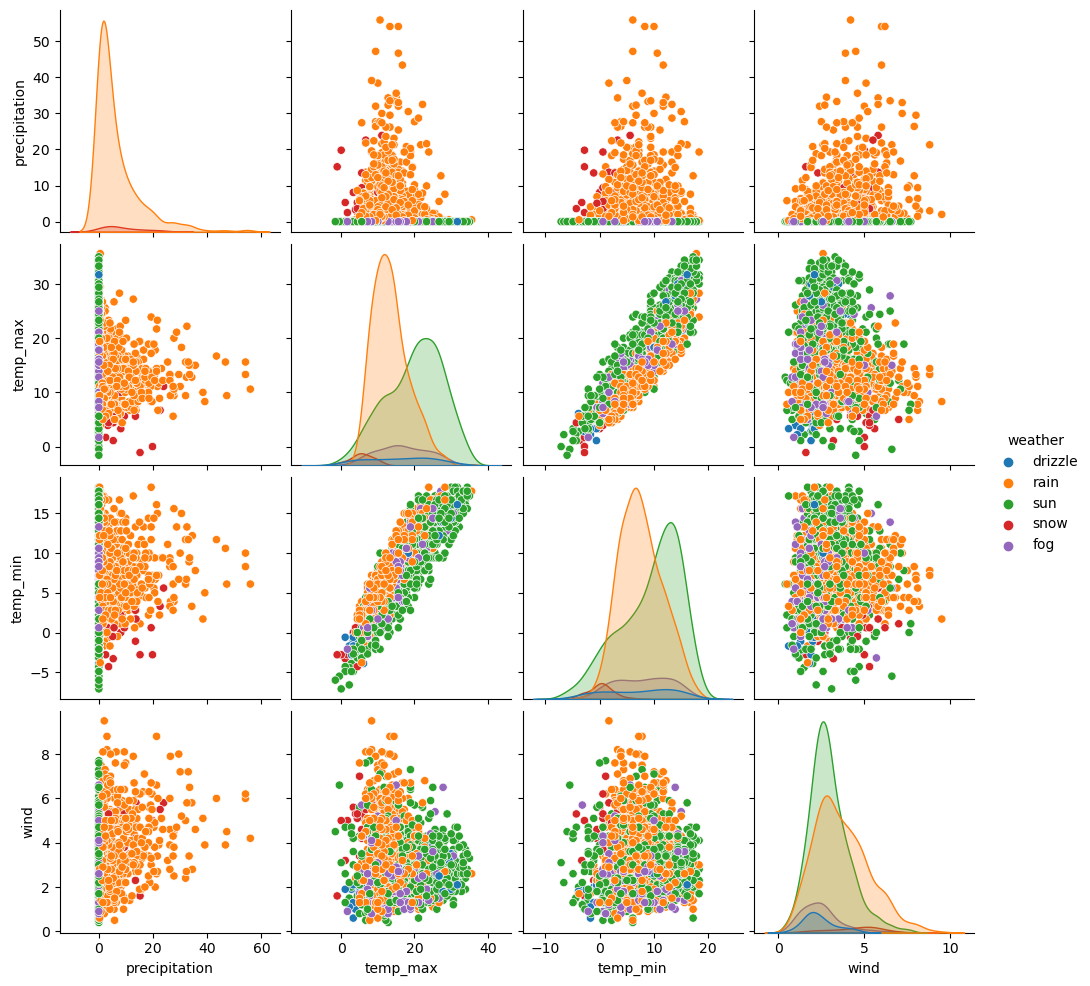

In [21]:
sns.pairplot(data, hue = 'weather')
plt.savefig('E:/Data_Science - Resources/Data Analysis Project - Data/ML/weather.png')